# Lab: Cleaning categorical data
_Week 4 - Day 1 - Afternoon_

## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives:**
- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# Cleaning numerical data

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
display(customer_df.shape)
display(customer_df.dtypes)

(9134, 24)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## Stantardize columns and clean data

### Columns

In [8]:
def standardize_columns(df):
    '''
This functions replaces the names of the columns by the lower case version,
blank spaces for underscores '_' and drops the column "Unnamed: 0" with index values
input: data frame
    '''
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df # If there is "unnamed: 0" column use (before: return df.drop(['unnamed:_0'], axis=1))
def clean_columns (df):
    df = standardize_columns(df)
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    #df['effective_month'] = df['effective_to_date'].dt.month
    return df

In [9]:
customer_df = clean_columns(customer_df)

In [10]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Missing values

In [11]:
customer_df.isnull().sum()/len(customer_df) # proportion of missing values per column in the dataframe

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

## Split variables: numerical&categorical
- Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [12]:
def var_types_split (df):
    numerical = df.select_dtypes(np.number)
    categorical = df.select_dtypes('object')
    return numerical, categorical

In [13]:
numerical_df, categorical_df = var_types_split(customer_df)

In [14]:
display(numerical_df.head())
display(categorical_df.head())


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Remove ID columns

In [15]:
categorical_df.drop('customer', axis=1, inplace=True)

In [16]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## Numerical columns

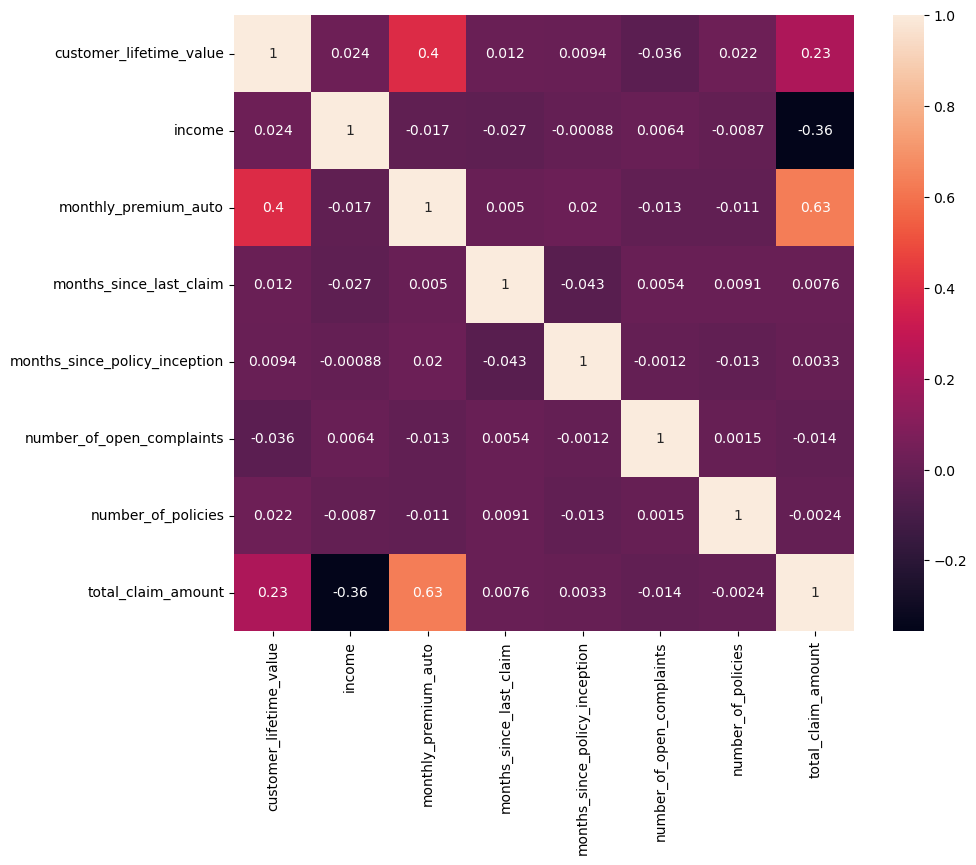

In [17]:
corr_matrix=numerical_df.corr() # default: Pearson
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Divide numerical variables: continuous - discrete

In [18]:
def numerical_split(df, cat=36):
    num_continuous_df = pd.DataFrame()
    num_discrete_df = pd.DataFrame()

    for col in df.columns:
        if df[col].nunique() > cat:
            num_continuous_df[col] = df[col]

        else:
            num_discrete_df[col] = df[col]

    return num_continuous_df, num_discrete_df

In [19]:
continuous_df, discrete_df = numerical_split(numerical_df)

In [20]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [21]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


## Plots

### Discrete


In [22]:
def plot_discrete(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.countplot(x=col, data=df)
    plt.tight_layout()
    plt.show()


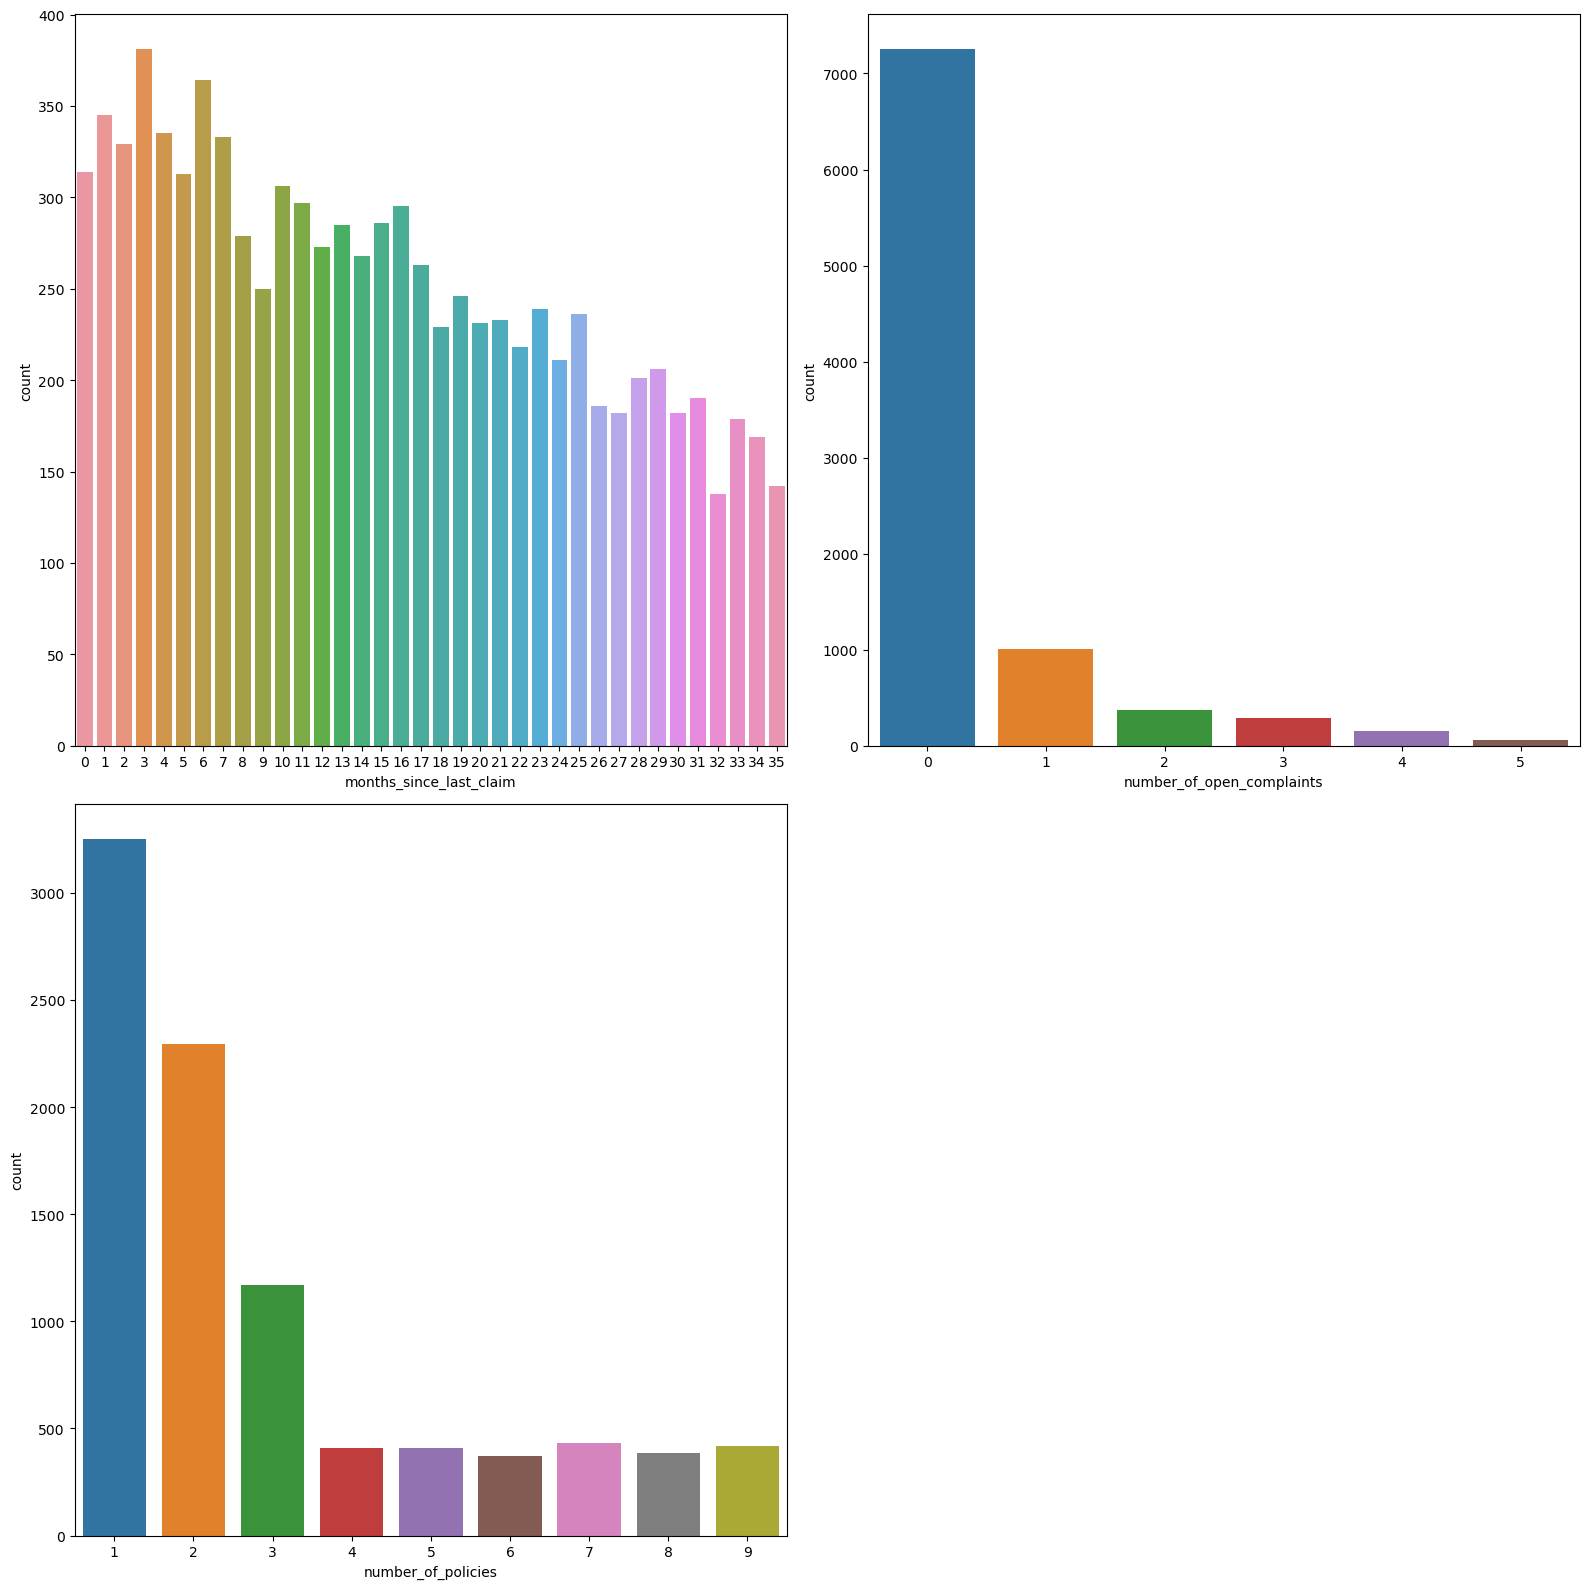

In [23]:
plot_discrete(discrete_df)

### Continuous


In [24]:
def plot_continuous(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.histplot(x=col, data=df, bins=150)
    plt.tight_layout()
    plt.show()

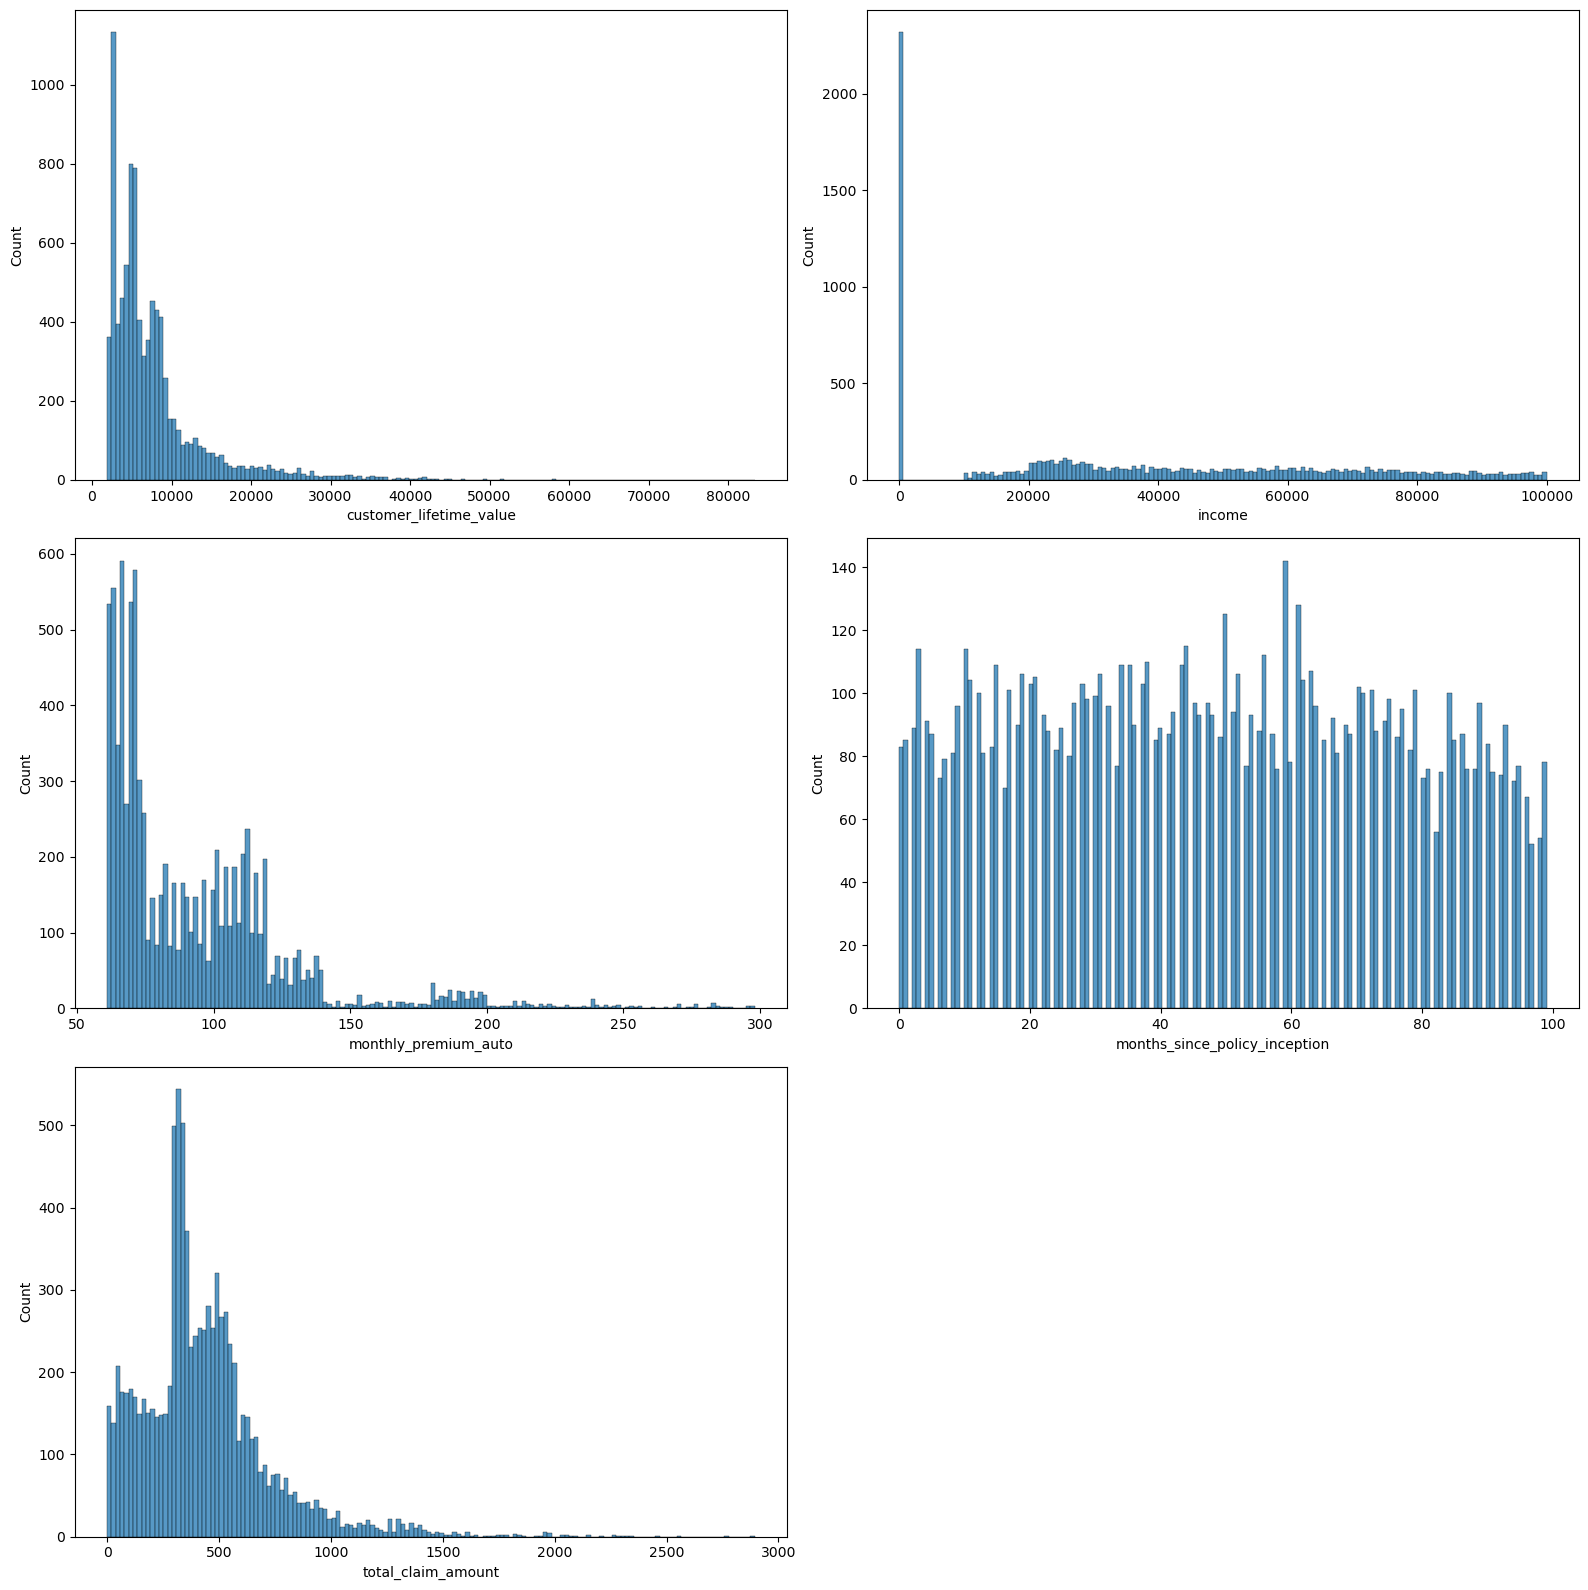

In [25]:
plot_continuous(continuous_df)

## Outliers

In [26]:
def boxplot_continuous(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.boxplot(y=col, data=df)
    plt.tight_layout()
    plt.show()

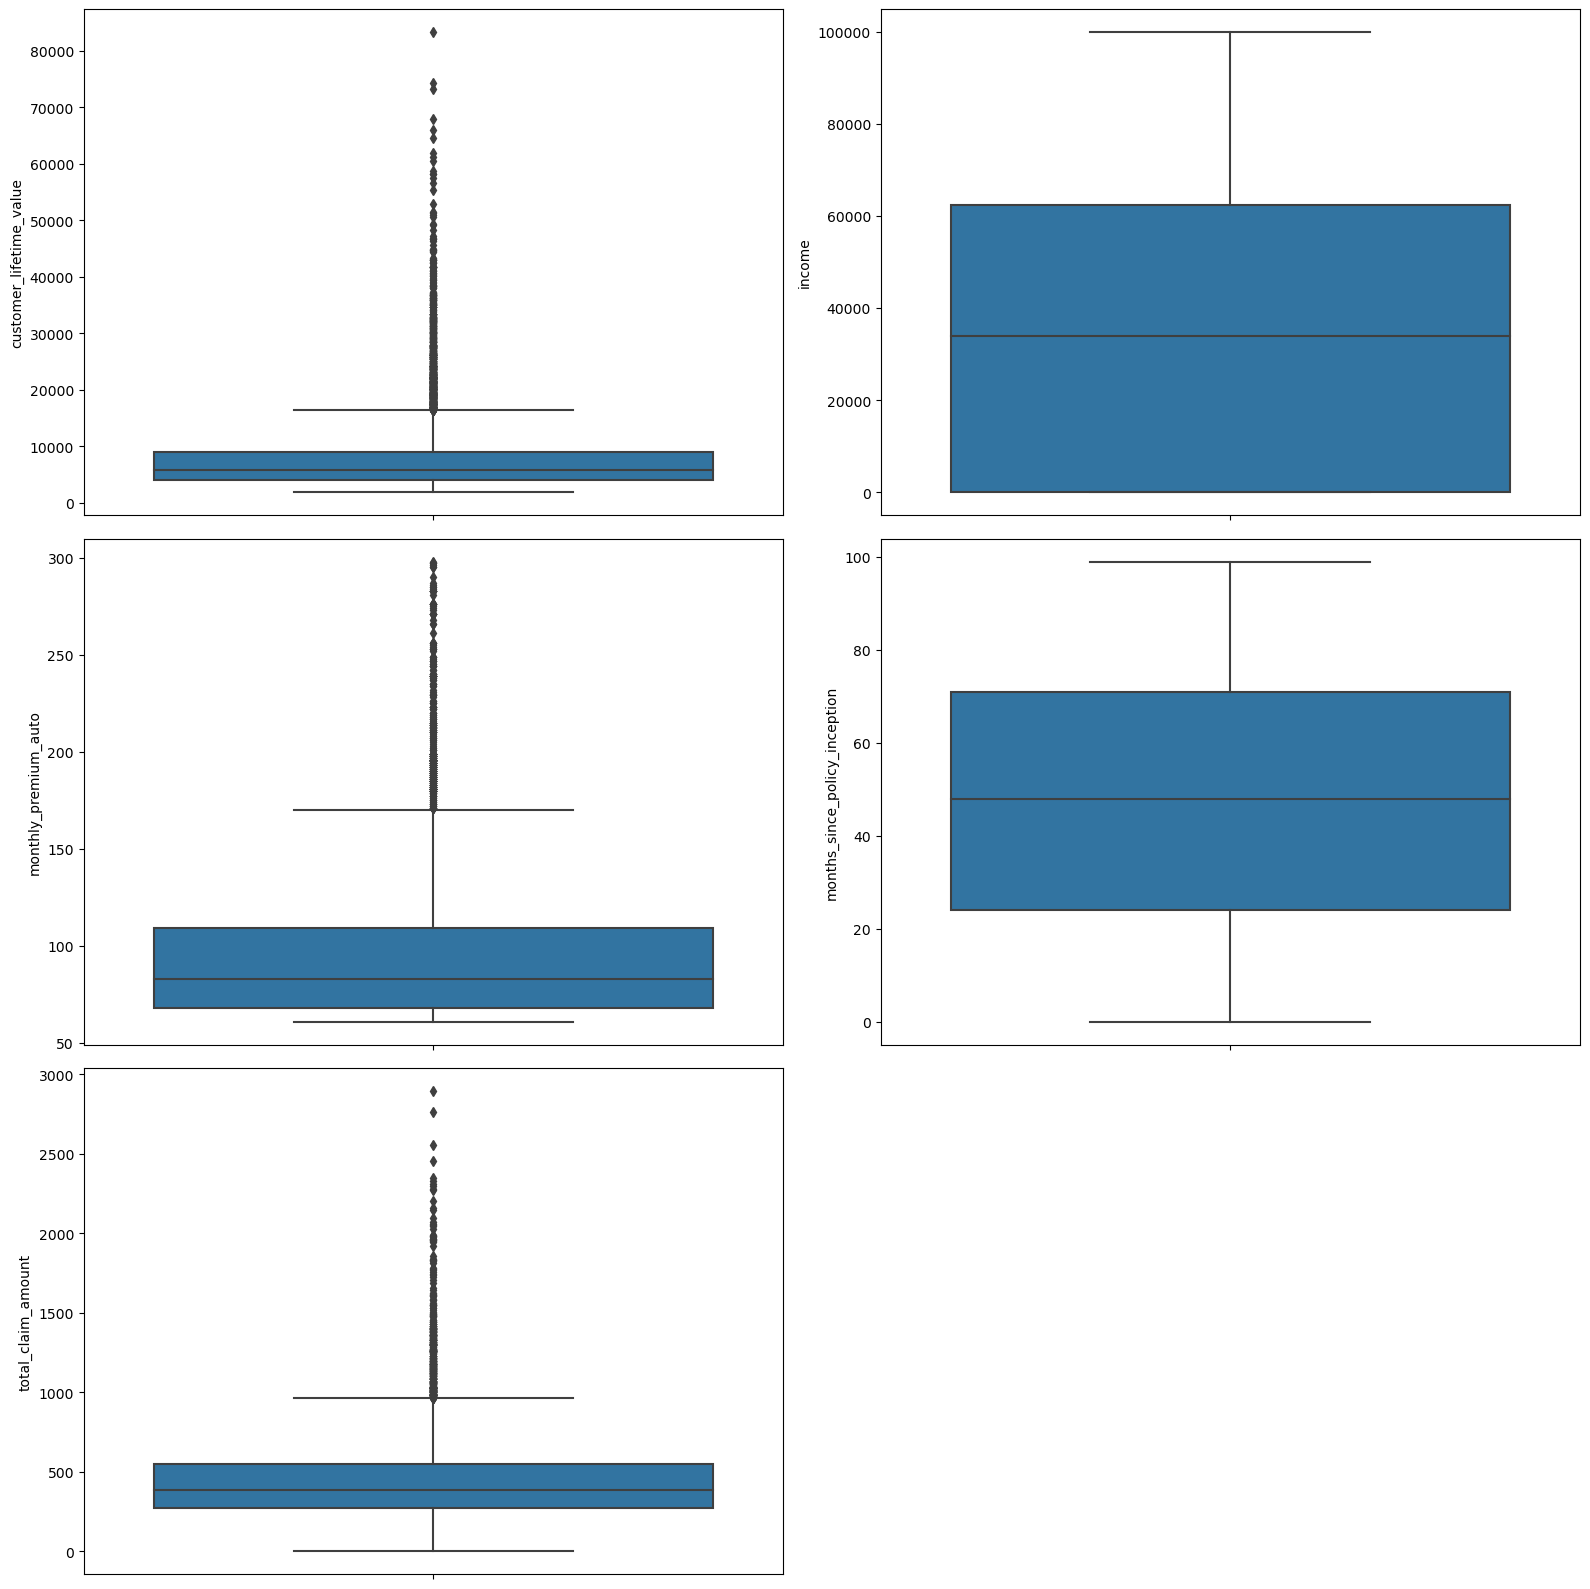

In [27]:
boxplot_continuous(continuous_df)

# Lab Cleaning categorical data
_Week4 - Day1 - Afternoon_

## Instructions

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.
1. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.
1. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)
1. To continue the analysis define an empty pandas DataFrame, and add the following new columns:

- day with the day number of effective_to_date
- day_name with the day NAME of effective_to_date
- week with the week of effective_to_date
- month with the month NAME of effective_to_date
- total_claim_amount with total_claim_amount

1. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)
1. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
1. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
1. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
1. Plot the median "target" by day of the week name using a seaborn barplot
1. What can you conclude from this analysis?
1. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
1. Can you do a monthly analysis given the output of the previous series? Why?
1. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
1. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
1. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.
1. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.
1. Turn the response column values into (Yes=1/No=0).
1. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
1. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
1. Deal with column Gender turning the values into (1/0).
1. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
1. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. 
1. Encode the coverage: "Premium" > "Extended" > "Basic".
1. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".
1. Encode the column location_code as: "Urban" > "Suburban" > "Rural".
1. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".
1. Get a dataframe with the categorical nominal columns
1. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie: levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

1. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels


## Plot
Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [28]:
def plot_categorical(df, cat=6):
    plt.figure(figsize=(16, 24))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        if df[col].nunique() < cat:
            sns.countplot(x=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")
        else:
            sns.countplot(y=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")   
    plt.tight_layout()
    plt.show()

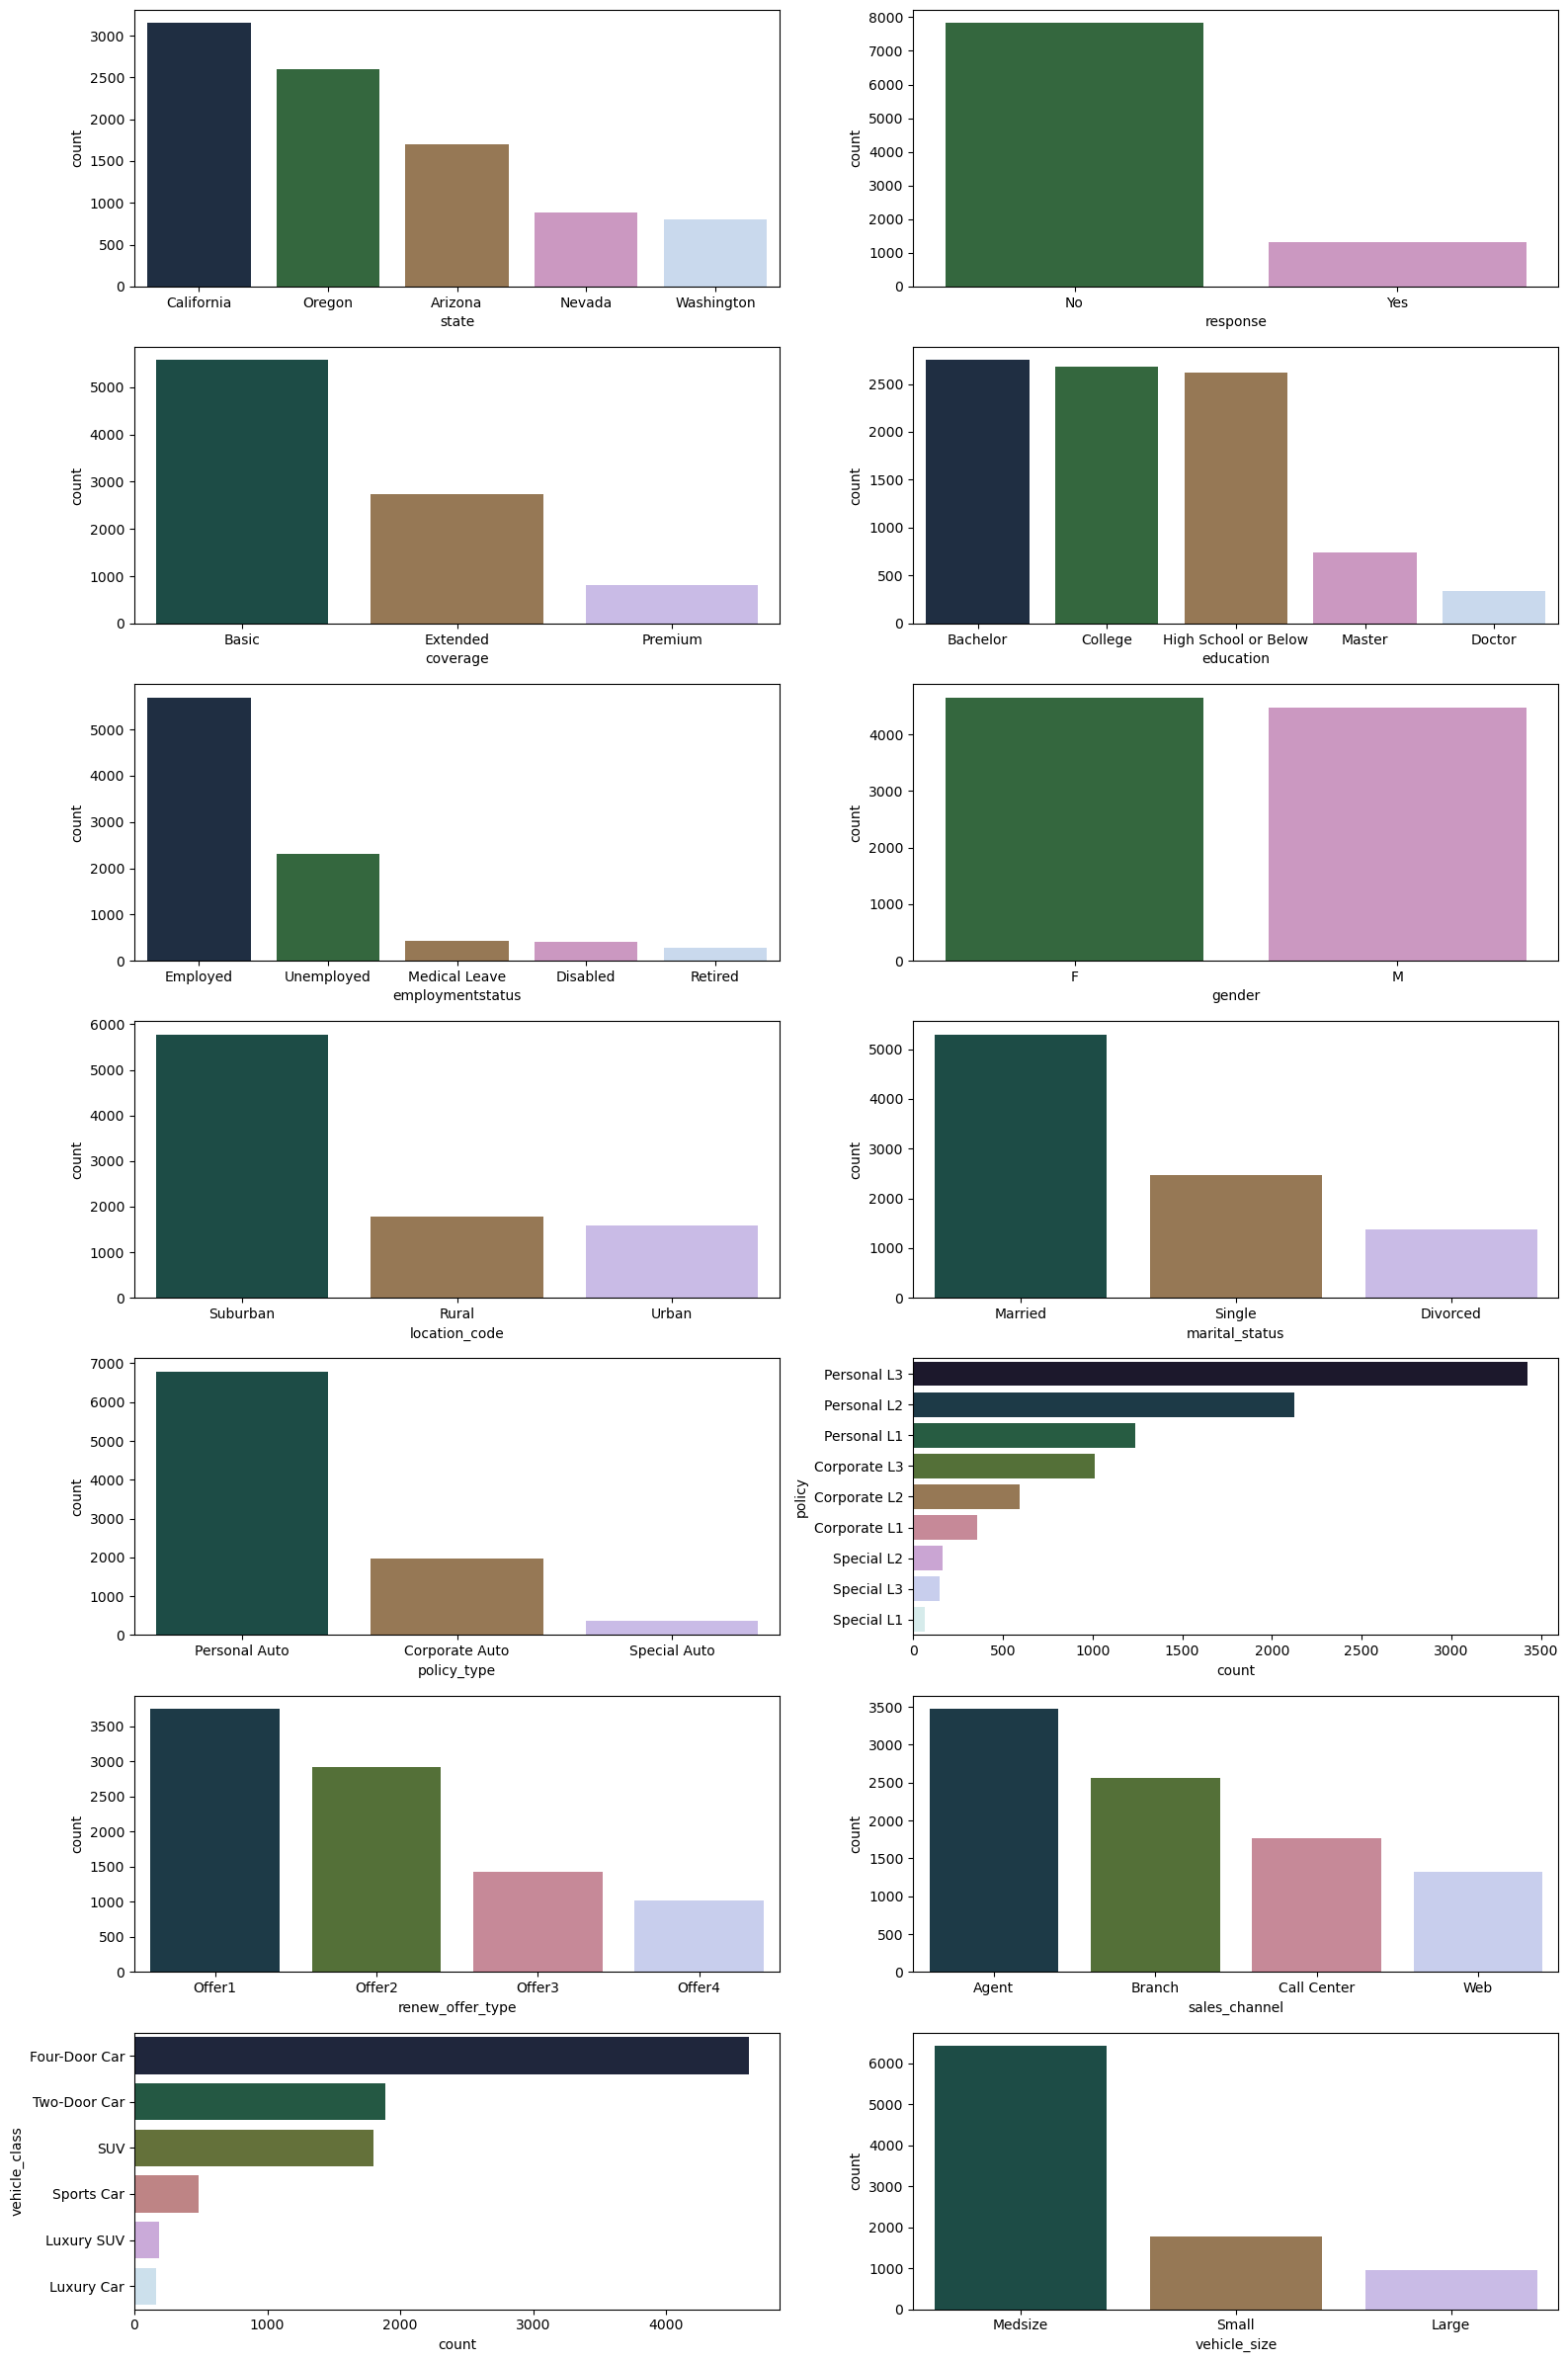

In [29]:
plot_categorical(categorical_df)

## Clean categorical variables
### Policy
policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [30]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [31]:
categorical_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [32]:
categorical_df.drop('policy_type', axis=1, inplace=True)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [33]:
def regroup_policy(col):
    if col in ['Corporate L3', 'Personal L3', 'Special L3']:
        return 'L3'
    elif col in ['Corporate L2', 'Personal L2', 'Special L2']:
        return 'L2'
    elif col in ['Corporate L1', 'Personal L1', 'Special L1']:
        return 'L1'
    else:
        return 'U'

In [34]:
categorical_df['policy'] = categorical_df['policy'].apply(regroup_policy)
categorical_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

## Time dependency analysis
Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

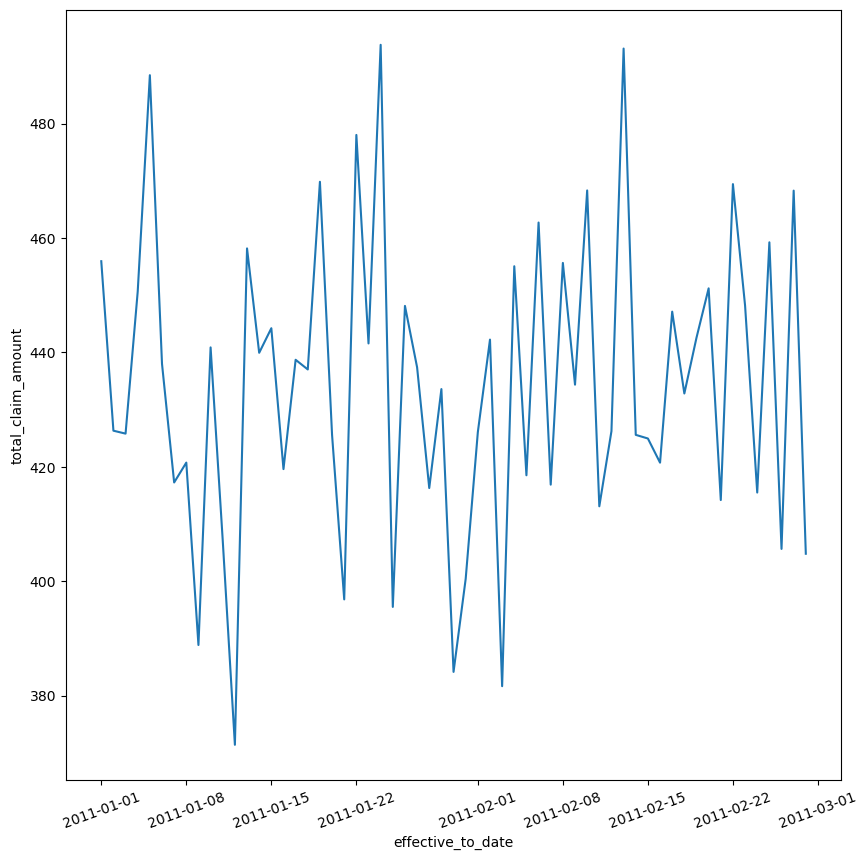

In [35]:
plt.figure(figsize=(10, 10))
sns.lineplot(x= 'effective_to_date', y='total_claim_amount', data=customer_df, ci=None)

plt.xticks(rotation=20)
plt.show()

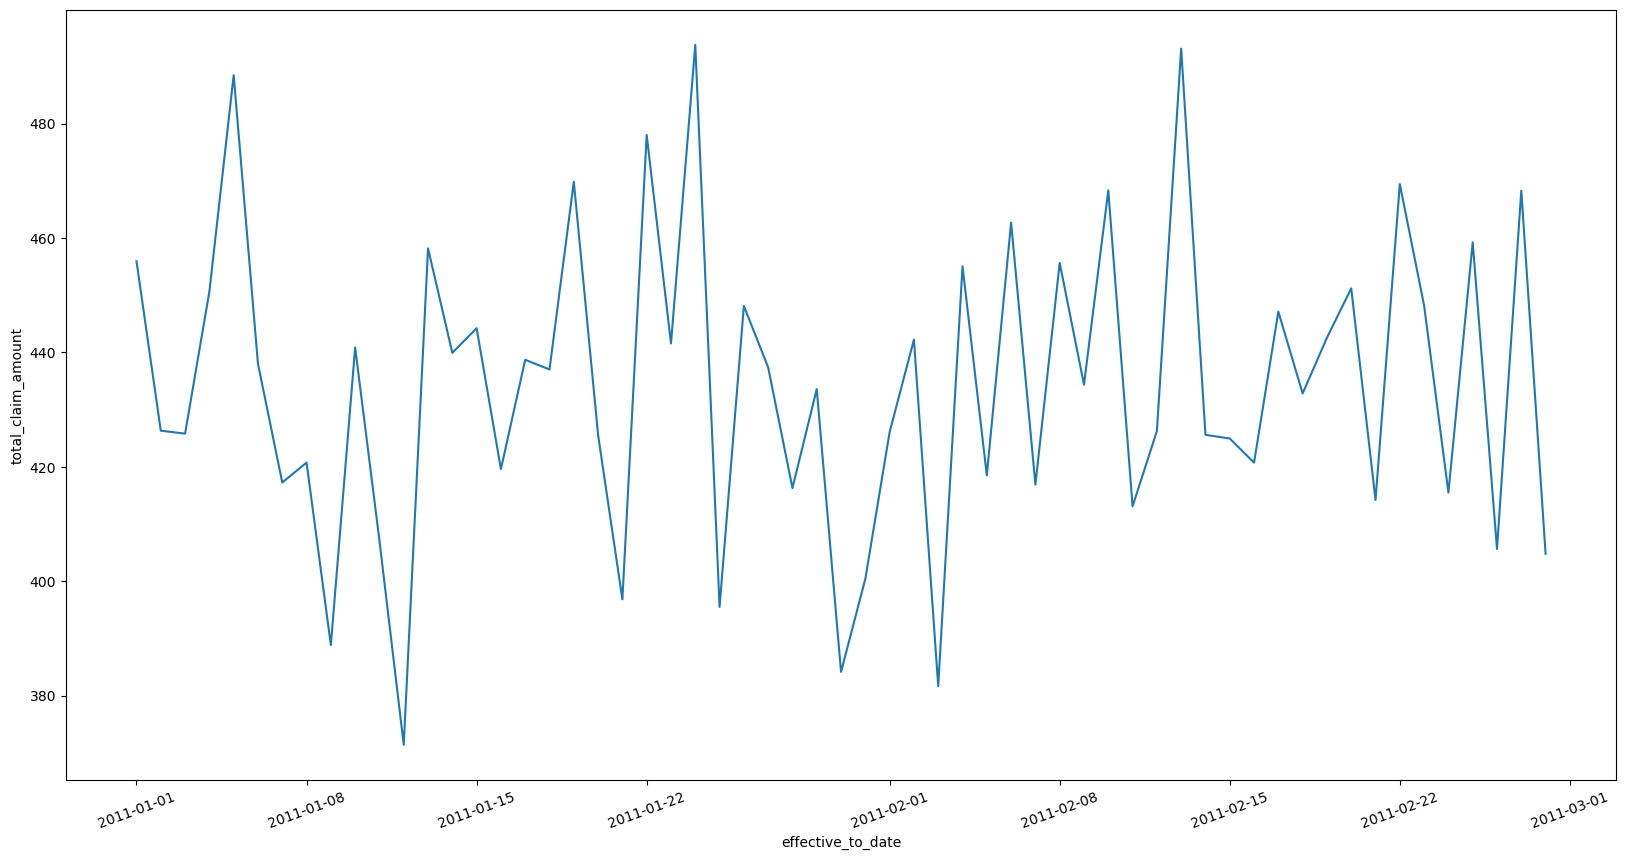

In [36]:
# I've changed the proportions of the figure for better visualization
plt.figure(figsize=(20, 10))
sns.lineplot(x= 'effective_to_date', y='total_claim_amount', data=customer_df, ci=None)

plt.xticks(rotation=20)
plt.show()

### Time analysis in new dataframe
To continue the analysis define an empty pandas DataFrame, and add the following new columns:

- day with the day number of effective_to_date
- day_name with the day NAME of effective_to_date
- week with the week of effective_to_date
- month with the month NAME of effective_to_date
- total_claim_amount with total_claim_amount

In [37]:
time_df = pd.DataFrame()
time_df['day'] = customer_df['effective_to_date'].dt.day
time_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
time_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
time_df['month'] = customer_df['effective_to_date'].dt.month_name()
time_df['total_claim_amount'] = customer_df['total_claim_amount']

In [38]:
time_df.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [39]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
claim_day_name = time_df.groupby(['day_name']).agg({'total_claim_amount': np.mean}).round(2).reindex(index=days)#.reset_index()
claim_day_name

,total_claim_amount
day_name,
Monday,428.56
Tuesday,432.46
Wednesday,443.54
Thursday,433.80
Friday,428.64
Saturday,435.26
Sunday,437.34


Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
- Mean total claim amount is the highest on Wednesday, followed by Sunday.
- Monday and Friday, with very similar mean values, are the days with the lowest amount claimed.
- We would need to check if the difference between the days is statistically significant.
- It would be interesting to see why it is so different between Wednesday and Sunday versus Monday and Friday. I guess the explanation for the lowest comes from being the first day of the week and Friday, when people go finally on weekend to rest and don't invest time on claiming money.

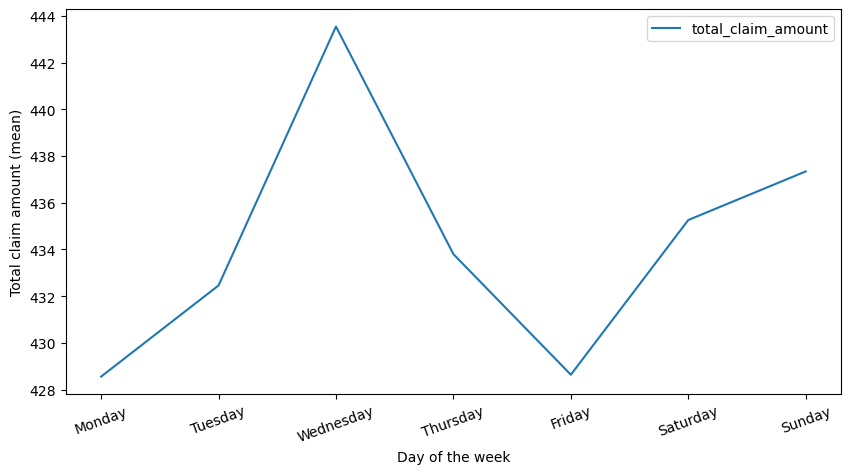

In [40]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=claim_day_name, ci=None)
plt.xlabel("Day of the week")
plt.ylabel("Total claim amount (mean)")
plt.xticks(rotation=20)
plt.show()

- Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [41]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
claim_num_day_name = time_df.groupby(['day_name']).agg({'total_claim_amount': 'count'}).round(2).reindex(index=days)#.reset_index()
claim_num_day_name

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


#### Median
- Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
- Plot the median "target" by day of the week name using a seaborn barplot
- What can you conclude from this analysis?

In [42]:
claim_median_day_name = time_df.groupby(['day_name']).agg({'total_claim_amount': 'median'}).round(2).sort_values(by='total_claim_amount',ascending=False).reset_index()
claim_median_day_name

,day_name,total_claim_amount
0,Thursday,395.33
1,Wednesday,392.24
2,Monday,385.74
3,Sunday,383.72
4,Saturday,379.20
5,Tuesday,378.49
6,Friday,371.80


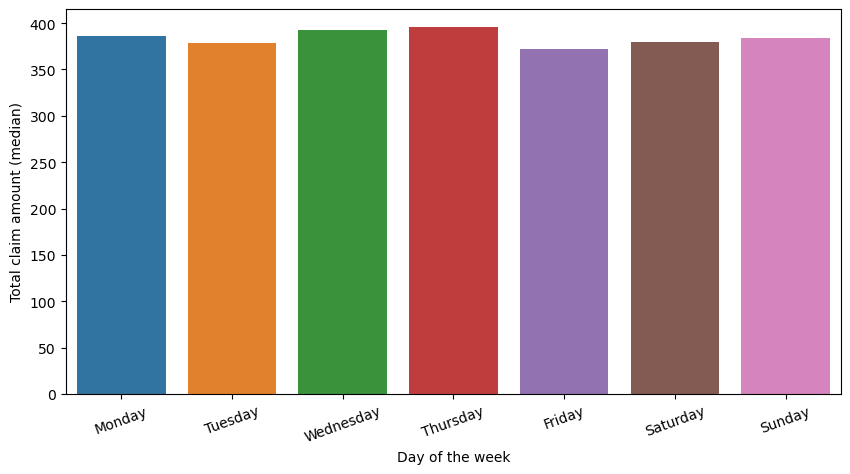

In [43]:
# plot ordered by day of the week. To plot it ordered by the median, remove "order=days"
plt.figure(figsize=(10, 5))
sns.barplot(data=claim_median_day_name, x='day_name', y='total_claim_amount', order=days)
plt.xlabel("Day of the week")
plt.ylabel("Total claim amount (median)")
plt.xticks(rotation=20)
plt.show()

#### Monthly
- Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
- Can you do a monthly analysis given the output of the previous series? Why?

_Answer_ Because we only have information for two months (January and Febraury)

In [44]:
import calendar
months = calendar.month_name[1:]
claim_month = time_df.groupby(['month']).agg({'total_claim_amount': np.mean}).round(2).reindex(index=months)#.reset_index()
claim_month

,total_claim_amount
month,
January,432.25
February,436.22
March,NaN
April,NaN
May,NaN
June,NaN
July,NaN
August,NaN
September,NaN


## Outliers
- Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
- Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [50]:
#cont_copy = continuous_df.copy()

def remove_outliers(df, thr=3):
    for col in df.columns:
        mean = np.mean(df[col])
        stdv = np.std(df[col])
        df = df[(df[col] > mean - thr*stdv) & (df[col] < mean + thr*stdv)]
    return df


In [55]:
continuous_cleaned_df = remove_outliers(continuous_df)
display(continuous_cleaned_df.shape)
display(continuous_df.shape)

(8575, 5)

(9134, 5)

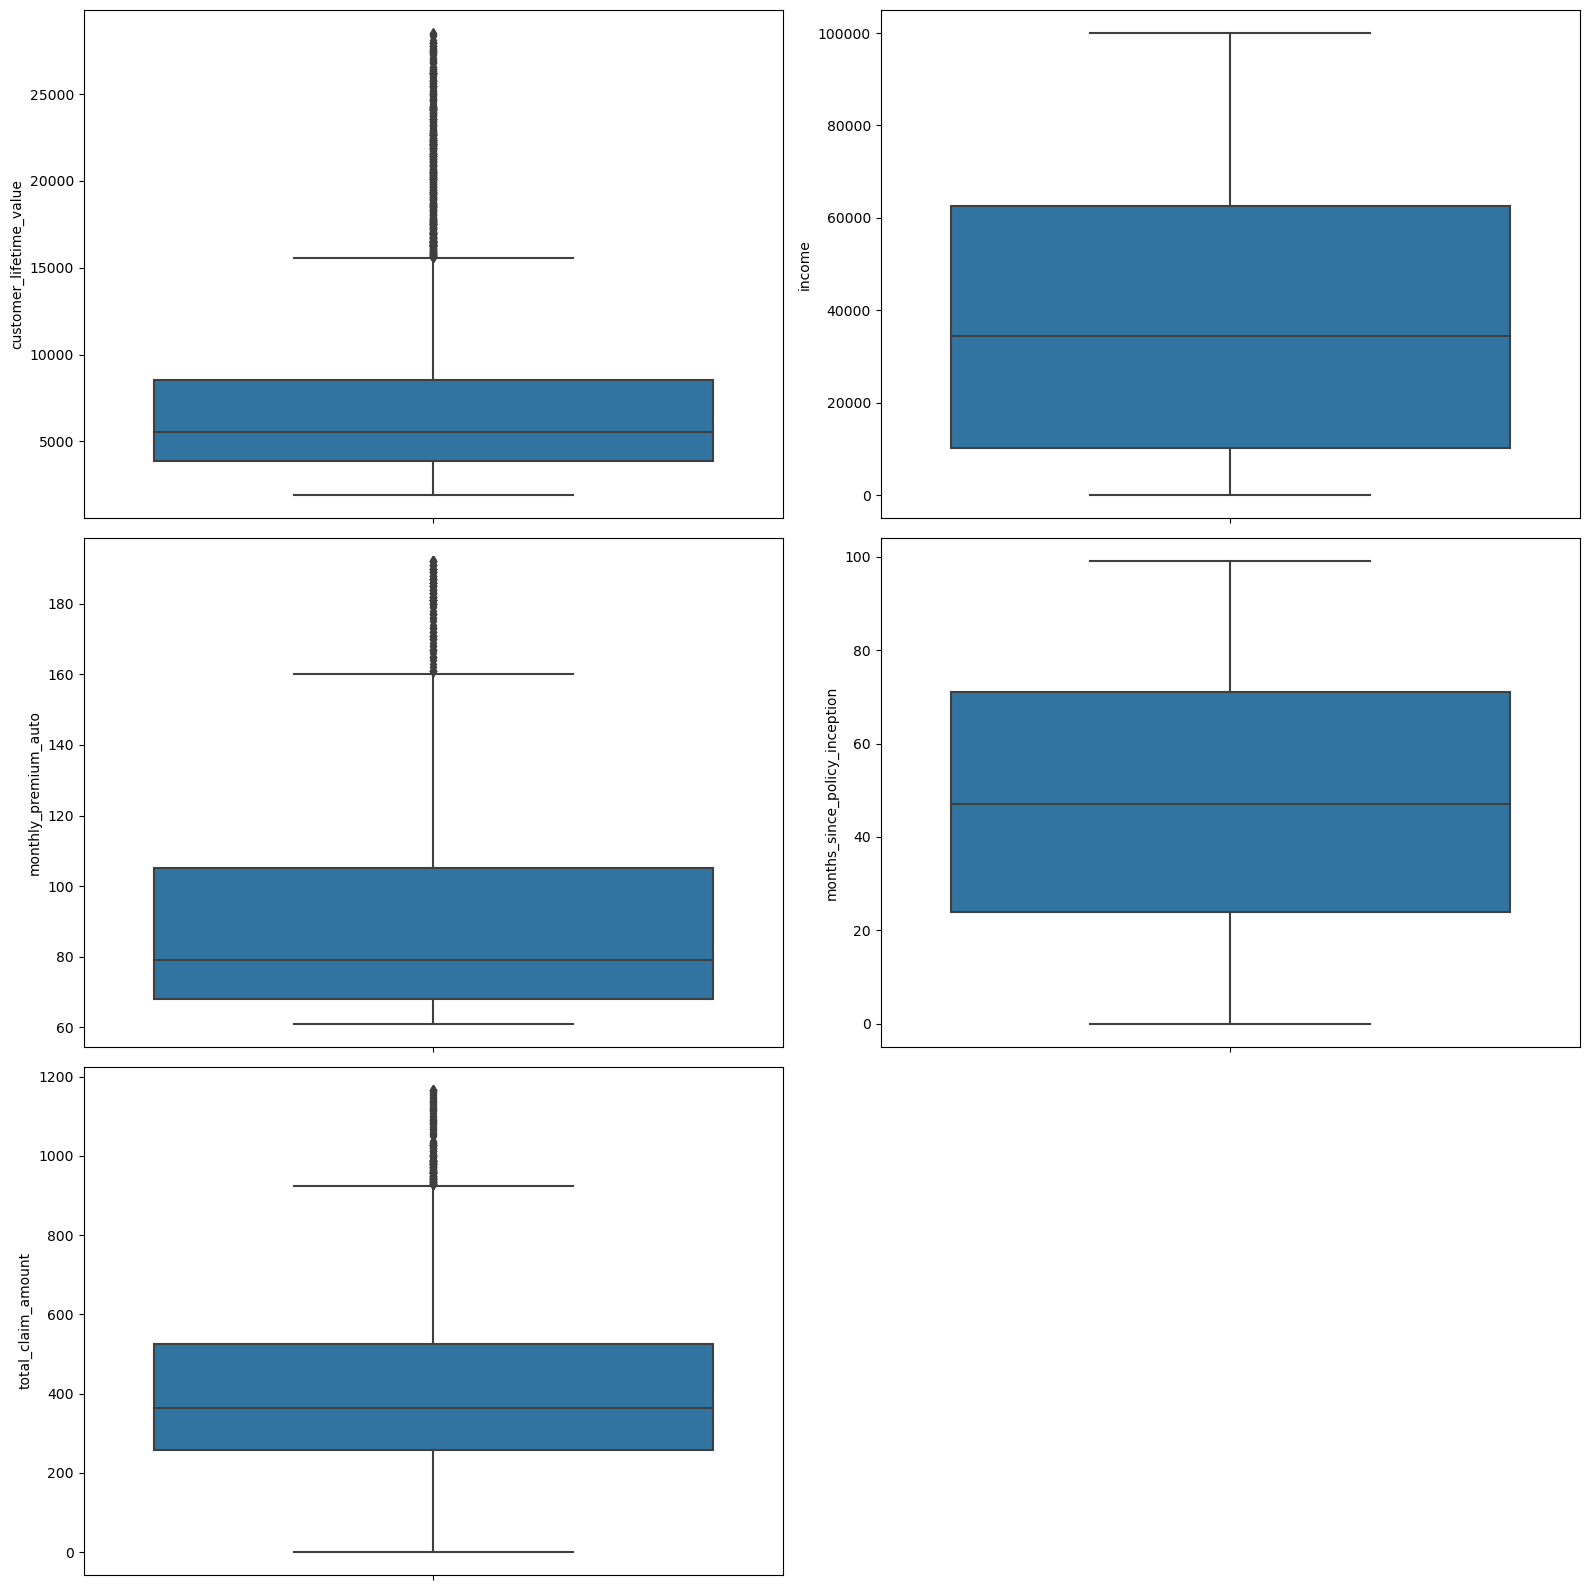

In [56]:
boxplot_continuous(continuous_cleaned_df)

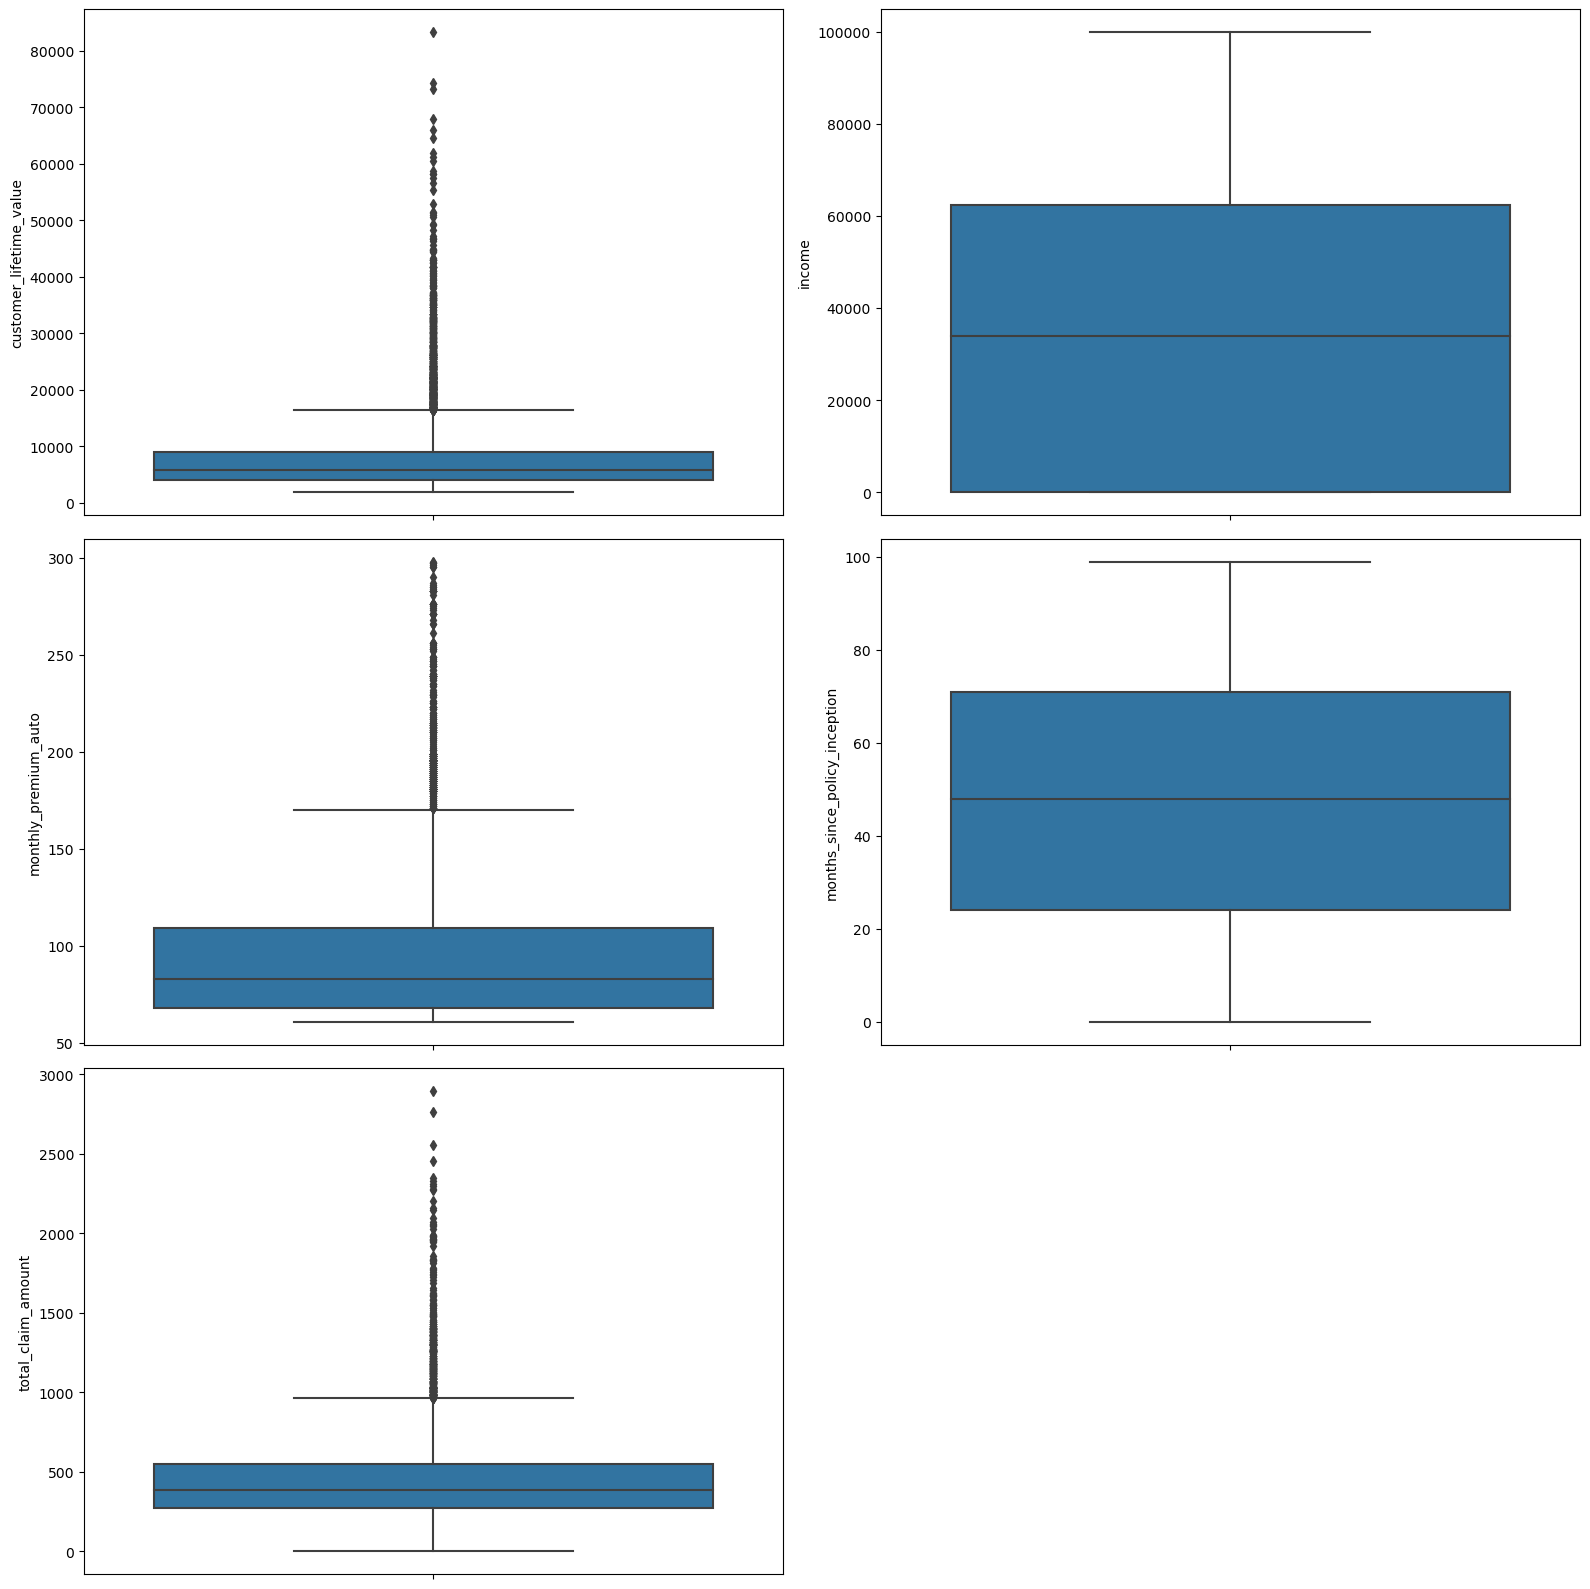

In [54]:
# without removing outliers (to compare)
boxplot_continuous(continuous_df) 

## Concatenate dataframes
- Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.
- Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [202]:
customer_cleaned_df = pd.concat([continuous_cleaned_df, discrete_df, categorical_df, time_df[['month', 'day_name']]], axis=1)
display(customer_cleaned_df.columns)
display(customer_cleaned_df.shape)
display(customer_cleaned_df.head())

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'month', 'day_name'],
      dtype='object')

(9134, 23)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday


In [203]:
customer_cleaned_df.isnull().sum()/len(customer_cleaned_df) # check missing values

customer_lifetime_value          0.0612
income                           0.0612
monthly_premium_auto             0.0612
months_since_policy_inception    0.0612
total_claim_amount               0.0612
months_since_last_claim          0.0000
number_of_open_complaints        0.0000
number_of_policies               0.0000
state                            0.0000
response                         0.0000
coverage                         0.0000
education                        0.0000
employmentstatus                 0.0000
gender                           0.0000
location_code                    0.0000
marital_status                   0.0000
policy                           0.0000
renew_offer_type                 0.0000
sales_channel                    0.0000
vehicle_class                    0.0000
vehicle_size                     0.0000
month                            0.0000
day_name                         0.0000
dtype: float64

In [204]:
customer_cleaned_df.dropna(inplace=True)
display(customer_cleaned_df.head())
display(customer_cleaned_df.shape)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday


(8575, 23)

In [205]:
customer_cleaned_df.reset_index(drop = True)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,February,Thursday
8571,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,February,Saturday
8572,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,February,Sunday
8573,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,February,Thursday


### Reorder columns
Using two different ways

#### Method 1: pop&insert

In [206]:
col = customer_cleaned_df.pop('total_claim_amount')
customer_cleaned_df.insert(0, 'total_claim_amount', col)
customer_cleaned_df

,total_claim_amount,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,384.811147,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,1131.464935,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,566.472247,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,529.881344,7645.861827,0.0,106.0,65.0,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,138.130879,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,198.234764,23405.987980,71941.0,73.0,89.0,18,0,2,California,No,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,February,Thursday
9130,379.200000,3096.511217,21604.0,79.0,28.0,14,0,1,California,Yes,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,February,Saturday
9131,790.784983,8163.890428,0.0,85.0,37.0,9,3,2,California,No,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,February,Sunday
9132,691.200000,7524.442436,21941.0,96.0,3.0,34,0,3,California,No,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,February,Thursday


#### Method 2: by name

In [118]:
# do not run this
cols_order = ['total_claim_amount','customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'month', 'day_name']
customer_cleaned_df = customer_cleaned_df[cols_order]
customer_cleaned_df

## Categorical variables


Response

In [207]:
customer_cleaned_df['response'] = customer_cleaned_df['response'].map({'Yes': 1, 'No': 0})
customer_cleaned_df['response'].unique()

array([0, 1], dtype=int64)

Education

In [208]:
customer_cleaned_df['education'] = list(map(lambda x: 'Graduate' if x in ['Master', 'Doctor'] else x, customer_cleaned_df['education']))
customer_cleaned_df['education'].value_counts(dropna=False)

Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: education, dtype: int64

Employment status

In [209]:
customer_cleaned_df['employmentstatus'] = list(map(lambda x: 'Inactive' if x in ['Medical Leave', 'Disabled', 'Retired'] else x, customer_cleaned_df['employmentstatus']))
customer_cleaned_df['employmentstatus'].value_counts(dropna=False)

Employed      5384
Unemployed    2127
Inactive      1064
Name: employmentstatus, dtype: int64

Gender

In [210]:
customer_cleaned_df['gender'] = customer_cleaned_df['gender'].map({'F': 1, 'M': 0})
customer_cleaned_df['gender'].value_counts(dropna=False)

1    4383
0    4192
Name: gender, dtype: int64

Vehicle class

In [211]:
customer_cleaned_df['vehicle_class'] = list(map(lambda x: 'Luxury' if x in ['Sports Car', 'Luxury SUV', 'Luxury Car'] else x, customer_cleaned_df['vehicle_class']))
customer_cleaned_df['vehicle_class'].value_counts(dropna=False)

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Luxury            502
Name: vehicle_class, dtype: int64

Coverage

In [212]:
customer_cleaned_df['coverage'] = customer_cleaned_df['coverage'].map({'Premium': 1, 'Extended': 2, 'Basic': 3})
customer_cleaned_df['coverage'].value_counts(dropna=False)

3    5353
2    2541
1     681
Name: coverage, dtype: int64

Employment status

In [214]:
customer_cleaned_df['employmentstatus'] = customer_cleaned_df['employmentstatus'].map({'Employed': 1, 'Inactive': 2, 'Unemployed': 3})
customer_cleaned_df['employmentstatus'].value_counts(dropna=False)

1    5384
3    2127
2    1064
Name: employmentstatus, dtype: int64

Location code

In [215]:
customer_cleaned_df['location_code'] = customer_cleaned_df['location_code'].map({'Urban': 1, 'Suburban': 2, 'Rural': 3})
customer_cleaned_df['location_code'].value_counts(dropna=False)

2    5342
3    1710
1    1523
Name: location_code, dtype: int64

Vehicle size

In [216]:
customer_cleaned_df['vehicle_size'] = customer_cleaned_df['vehicle_size'].map({'Large': 1, 'Medsize': 2, 'Small': 3})
customer_cleaned_df['vehicle_size'].value_counts(dropna=False)

2    6033
3    1644
1     898
Name: vehicle_size, dtype: int64

In [217]:
cust_copy = customer_cleaned_df.copy()

### Nominal
1. Get a dataframe with the categorical nominal columns
1. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie: levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [219]:
categorical_nominal_df = customer_cleaned_df[['state', 'education', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
categorical_nominal_df.head()

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car


In [230]:
def list_nominal_cat(df):
    list = []
    for column in df.columns:
        list1 = df[column].unique().tolist()
        list.append(list1)
    return list

In [239]:
levels = list_nominal_cat(categorical_nominal_df)

In [240]:
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]

#### OneHotEncoder
- Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [241]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first', categories=levels)
#encoder.fit(categoricals_train)

#categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
#categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

#categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
#categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
#display(categoricals_train_encoded.head())
#display(categoricals_test_encoded.head())